 Importing and installing
  some useful libraries

INSTALLING LIBRARIES


In [181]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import plotly.express as px
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
#from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [182]:
phish_data = pd.read_csv("phising_data.csv")
phish_data.head()

,Label,URL
0,bad,nobell.it/70ffb52d079109dca5664cce6f317373782/...
1,bad,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...
2,bad,serviciosbys.com/paypal.cgi.bin.get-into.herf....
3,bad,mail.printakid.com/www.online.americanexpress....
4,bad,thewhiskeydregs.com/wp-content/themes/widescre...


In [183]:
phish_data['URL'] = "https://" + df['URL'].astype(str)

In [184]:
phish_data.head()

,Label,URL
0,bad,https://nobell.it/70ffb52d079109dca5664cce6f31...
1,bad,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...
2,bad,https://serviciosbys.com/paypal.cgi.bin.get-in...
3,bad,https://mail.printakid.com/www.online.american...
4,bad,https://thewhiskeydregs.com/wp-content/themes/...


In [185]:
phish_data.isnull().sum()

Label     0
URL      97
dtype: int64

In [186]:
phish_data.dropna(inplace=True)

In [187]:
phish_data.isnull().sum()

Label    0
URL      0
dtype: int64

In [188]:
phish_data['Label'].value_counts()

good    48009
bad     47633
Name: Label, dtype: int64

Since it is classification problems so let's see the classes are balanced or imbalances


In [132]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())

In [133]:
#visualizing target_col
fig = px.bar(label_counts, x=label_counts.index, y=label_counts.Label)
fig.show()


Preprocessing

    Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.


RegexpTokenizer

    A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.



In [134]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')#to getting alpha only

In [136]:


phish_data.URL[1000]



"https://'login.paypal.com.ummiecollections.com/Nouveau\\%20dossier/Confirm.php?cmd=_login-run&amp;dispatch=5885d80a13c0db1f998ca054efbdf2c29878a435fe324eec2511727fbf3e9efcd8'"

In [138]:
tokenizer.tokenize(phish_data.URL[0]) # using first row

['https',
 'nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [139]:


print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 0.6246820910000679 sec


In [140]:
phish_data.sample(5)

,Label,URL,text_tokenized
57907,good,https://algo.inria.fr/AofA/Problems/,"[https, algo, inria, fr, AofA, Problems]"
71733,good,https://www.sliver.com/dotnet/SnippetCompiler/,"[https, www, sliver, com, dotnet, SnippetCompi..."
48765,good,https://en.wikipedia.org/wiki/Vivendi,"[https, en, wikipedia, org, wiki, Vivendi]"
49109,good,https://groups.yahoo.com/adultconf?dest=/group...,"[https, groups, yahoo, com, adultconf, dest, g..."
36844,bad,https://servicepay.xtrweb.com/paypal.com.ca.cg...,"[https, servicepay, xtrweb, com, paypal, com, ..."



SnowballStemmer

    Snowball is a small string processing language, gives root words



In [141]:


stemmer = SnowballStemmer("english") # choose a language



In [142]:


print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')



Getting words stemmed ...
Time taken 13.182642148000014 sec


In [143]:
phish_data.sample(5)

,Label,URL,text_tokenized,text_stemmed
65922,good,https://mycyberbuddy.com/cyberoptimizer/,"[https, mycyberbuddy, com, cyberoptimizer]","[https, mycyberbuddi, com, cyberoptim]"
29528,bad,https://muhammadgroup.com/09uk381/cgi-bin&disp...,"[https, muhammadgroup, com, uk, cgi, bin, disp...","[https, muhammadgroup, com, uk, cgi, bin, disp..."
72008,good,https://www.oshonsoft.com/pic.html,"[https, www, oshonsoft, com, pic, html]","[https, www, oshonsoft, com, pic, html]"
78518,good,https://www.hwaci.com/sw/tkhtml/index.html,"[https, www, hwaci, com, sw, tkhtml, index, html]","[https, www, hwaci, com, sw, tkhtml, index, html]"
50429,good,https://www2.salzburg.info/congress.php,"[https, www, salzburg, info, congress, php]","[https, www, salzburg, info, congress, php]"


In [144]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.06826678399966113 sec


In [145]:


phish_data.sample(5)



,Label,URL,text_tokenized,text_stemmed,text_sent
78942,good,https://www.visual-paradigm.com/product/vpuml/...,"[https, www, visual, paradigm, com, product, v...","[https, www, visual, paradigm, com, product, v...",https www visual paradigm com product vpuml vp...
54343,good,https://www.hkbu.edu.hk/~fds/,"[https, www, hkbu, edu, hk, fds]","[https, www, hkbu, edu, hk, fds]",https www hkbu edu hk fds
42817,bad,https://www.doneusebio.com/intl/update/webscr2...,"[https, www, doneusebio, com, intl, update, we...","[https, www, doneusebio, com, intl, updat, web...",https www doneusebio com intl updat webscr php...
35682,bad,https://paypal-sicherheitsservice.de/km/verifi...,"[https, paypal, sicherheitsservice, de, km, ve...","[https, paypal, sicherheitsservic, de, km, ver...",https paypal sicherheitsservic de km verifik i...
20896,bad,https://'tulippark.cn/js/?us.battle.net/login/...,"[https, tulippark, cn, js, us, battle, net, lo...","[https, tulippark, cn, js, us, battl, net, log...",https tulippark cn js us battl net login en re...



Visualization

1. Visualize some important keys using word cloud


In [146]:


#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']



In [147]:
bad_sites.head()

,Label,URL,text_tokenized,text_stemmed,text_sent
0,bad,https://nobell.it/70ffb52d079109dca5664cce6f31...,"[https, nobell, it, ffb, d, dca, cce, f, login...","[https, nobel, it, ffb, d, dca, cce, f, login,...",https nobel it ffb d dca cce f login skype com...
1,bad,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,"[https, www, dghjdgf, com, paypal, co, uk, cyc...","[https, www, dghjdgf, com, paypal, co, uk, cyc...",https www dghjdgf com paypal co uk cycgi bin w...
2,bad,https://serviciosbys.com/paypal.cgi.bin.get-in...,"[https, serviciosbys, com, paypal, cgi, bin, g...","[https, serviciosbi, com, paypal, cgi, bin, ge...",https serviciosbi com paypal cgi bin get into ...
3,bad,https://mail.printakid.com/www.online.american...,"[https, mail, printakid, com, www, online, ame...","[https, mail, printakid, com, www, onlin, amer...",https mail printakid com www onlin americanexp...
4,bad,https://thewhiskeydregs.com/wp-content/themes/...,"[https, thewhiskeydregs, com, wp, content, the...","[https, thewhiskeydreg, com, wp, content, them...",https thewhiskeydreg com wp content theme wide...


In [148]:


good_sites.head()



,Label,URL,text_tokenized,text_stemmed,text_sent
47730,good,https://sujaygarden.com/images//M_images/w/san...,"[https, sujaygarden, com, images, M, images, w...","[https, sujaygarden, com, imag, m, imag, w, sa...",https sujaygarden com imag m imag w santa php
47731,good,https://www.vidamissao.com/ccs/ssl.areasegurac...,"[https, www, vidamissao, com, ccs, ssl, arease...","[https, www, vidamissao, com, ccs, ssl, arease...",https www vidamissao com ccs ssl areaseguracie...
47732,good,https://www.vidamissao.com/ccs/ssl.areasegurac...,"[https, www, vidamissao, com, ccs, ssl, arease...","[https, www, vidamissao, com, ccs, ssl, arease...",https www vidamissao com ccs ssl areaseguracie...
47733,good,https://www.scubatec.it/pricelist/www1.yahooo1...,"[https, www, scubatec, it, pricelist, www, yah...","[https, www, scubatec, it, pricelist, www, yah...",https www scubatec it pricelist www yahooo ww ...
47734,good,https://www.scubatec.it/pricelist/update/yahoo...,"[https, www, scubatec, it, pricelist, update, ...","[https, www, scubatec, it, pricelist, updat, y...",https www scubatec it pricelist updat yahoo html




    create a function to visualize the important keys from url



In [149]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
#d = '../input/masks/masks-wordclouds/'  ##d = location of image

In [150]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [151]:

#common_text = str(data)
#common_mask = np.array(Image.open( d +'star.png'))
#plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
#               title = 'Most common words use in good urls', title_size=15)



In [152]:


data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)



In [153]:
## to modify
common_text = str(data)
#common_mask = np.array(Image.open(d+'comment.png'))
#plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
#               title = 'Most common words use in bad urls', title_size=15)


Creating Model
CountVectorizer

    CountVectorizer is used to transform a corpora of text to a vector of term / token counts

In [ ]:
#create cv object
cv = CountVectorizer()


help(CountVectorizer())



In [156]:


feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed



In [157]:


feature[:5].toarray() # convert sparse matrix into array to print transformed features



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Spliting the data

In [158]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [159]:


# create lr object
lr = LogisticRegression()




LogisticRegression

    Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.



In [160]:


lr.fit(trainX,trainY)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:


lr.score(testX,testY)



0.9641169336288737




.* Logistic Regression is giving 96% accuracy, Now we will store scores in dict to see which model perform best


In [162]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9851389218050773
Testing Accuracy : 0.9641169336288737

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.95      0.98      0.96     11539
        Good       0.98      0.95      0.96     12372

    accuracy                           0.96     23911
   macro avg       0.96      0.96      0.96     23911
weighted avg       0.96      0.96      0.96     23911


CONFUSION MATRIX


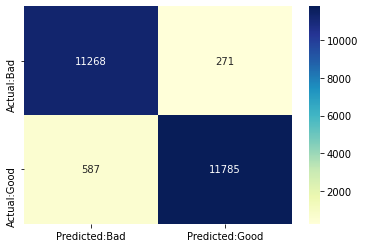

In [163]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


MultinomialNB

    Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.



In [164]:


# create mnb object
mnb = MultinomialNB()



In [165]:


mnb.fit(trainX,trainY)



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [166]:


mnb.score(testX,testY)



0.9552507214252854



* MultinomialNB gives us 95% accuracy


In [167]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9727593369672806
Testing Accuracy : 0.9552507214252854

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.98      0.95     11289
        Good       0.98      0.94      0.96     12622

    accuracy                           0.96     23911
   macro avg       0.96      0.96      0.96     23911
weighted avg       0.96      0.96      0.96     23911


CONFUSION MATRIX


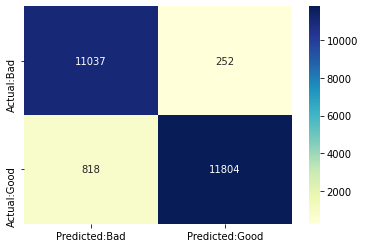

In [168]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

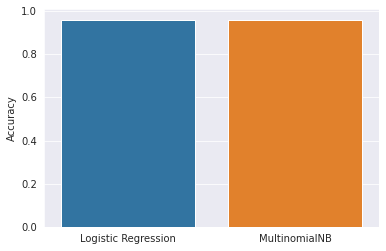

In [169]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression

In [170]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+)  -- these tolenizers giving me low accuray 

In [171]:


trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)



In [172]:
pipeline_ls.fit(trainX,trainY)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<bo...mpty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                   

In [173]:
pipeline_ls.score(testX,testY)

0.9642842206515829

Training Accuracy : 0.9861287309531444
Testing Accuracy : 0.9642842206515829

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.95      0.98      0.96     11569
        Good       0.98      0.95      0.96     12342

    accuracy                           0.96     23911
   macro avg       0.96      0.96      0.96     23911
weighted avg       0.96      0.96      0.96     23911


CONFUSION MATRIX


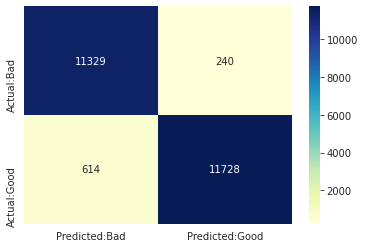

In [174]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [175]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [176]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9642842206515829


In [180]:
predict_bad = [' 	https://olx.pl-payed.cyou','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['yeniik.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'good' 'bad']
******************************
['good' 'good' 'good' 'good']
